<a href="https://colab.research.google.com/github/abhisha-k/datascience_nlp/blob/master/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Data Science/project/spam-vs-ham-dataset.csv")

In [ ]:
df.head()

,Text,Label
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham


In [ ]:
df.tail()

,Text,Label
5569,This is the 2nd time we have tried 2 contact u...,spam
5570,Will ü b going to esplanade fr home?,ham
5571,"Pity, * was in mood for that. So...any other s...",ham
5572,The guy did some bitching but I acted like i'd...,ham
5573,Rofl. Its true to its name,ham


In [ ]:
df.shape

(5574, 2)

In [ ]:
df.columns

Index(['Text', 'Label'], dtype='object')

In [ ]:
df['Label'].value_counts()

,count
Label,
ham,4827
spam,747


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    5574 non-null   object
 1   Label   5574 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
df.isnull().sum()

,0
Text,0
Label,0


In [ ]:
df.duplicated().sum()

403

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(5171, 2)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

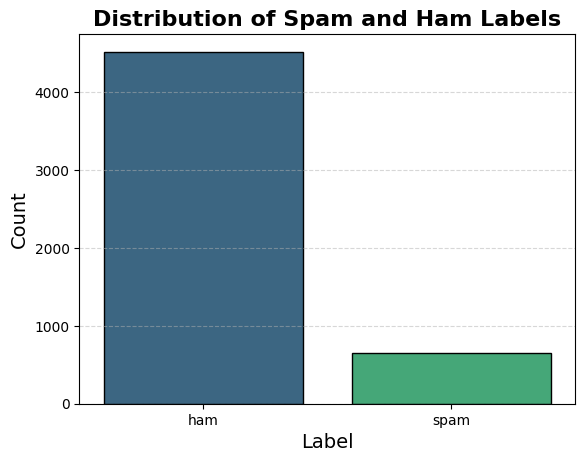

In [ ]:
# Visualizing the distribution of labels
sns.countplot(x='Label', data=df, hue='Label', palette='viridis', edgecolor='black', legend=False)
plt.title('Distribution of Spam and Ham Labels', fontsize=16, fontweight='bold')
plt.xlabel('Label', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


In [ ]:
# text preprocessing
text = df['Text']

In [ ]:
type(text)

pandas.core.series.Series

In [ ]:
text1=[]

In [ ]:
# leaning and preprocessing the text data
import re

for txt in df['Text']:
    # Convert to lowercase anf remove spcl characters
    txt = txt.lower()
    txt = re.sub(r'<br\s*/?>', ' ', txt)
    txt = re.sub(r'\W', ' ', txt)
    txt = re.sub(r'\d', ' ', txt)
    txt = re.sub(r'\s+', ' ', txt).strip()
    # Append cleaned text to text1
    text1.append(txt)


In [ ]:
text1

['go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat',
 'ok lar joking wif u oni',
 'free entry in a wkly comp to win fa cup final tkts st may text fa to to receive entry question std txt rate t c s apply over s',
 'u dun say so early hor u c already then say',
 'nah i don t think he goes to usf he lives around here though',
 'freemsg hey there darling it s been week s now and no word back i d like some fun you up for it still tb ok xxx std chgs to send to rcv',
 'even my brother is not like to speak with me they treat me like aids patent',
 'as per your request melle melle oru minnaminunginte nurungu vettam has been set as your callertune for all callers press to copy your friends callertune',
 'winner as a valued network customer you have been selected to receivea prize reward to claim call claim code kl valid hours only',
 'had your mobile months or more u r entitled to update to the latest colour mobiles with camera for free call 

In [ ]:
text=pd.Series(text1)

In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize
text = text.apply(lambda x:' '.join([w for w in word_tokenize(x) if len(w)>=3]))

In [ ]:
text

,0
0,until jurong point crazy available only bugis ...
1,lar joking wif oni
2,free entry wkly comp win cup final tkts may te...
3,dun say early hor already then say
4,nah don think goes usf lives around here though
...,...
5166,this the time have tried contact have won the ...
5167,will going esplanade home
5168,pity was mood for that any other suggestions
5169,the guy did some bitching but acted like inter...


In [ ]:
# lowecase conversion and normalization(convert in to root form or cut the tail part)
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('english')
text = text.apply(lambda x:[stemmer.stem(i.lower()) for i in word_tokenize(x)]).apply(lambda x:' '.join(x))

In [ ]:
text

,0
0,until jurong point crazi avail onli bugi great...
1,lar joke wif oni
2,free entri wkli comp win cup final tkts may te...
3,dun say earli hor alreadi then say
4,nah don think goe usf live around here though
...,...
5166,this the time have tri contact have won the po...
5167,will go esplanad home
5168,piti was mood for that ani other suggest
5169,the guy did some bitch but act like interest b...


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
text = text.apply(lambda x:[i for i in word_tokenize(x) if i not in stop]).apply(lambda x:' '.join(x))

In [ ]:
text

,0
0,jurong point crazi avail onli bugi great world...
1,lar joke wif oni
2,free entri wkli comp win cup final tkts may te...
3,dun say earli hor alreadi say
4,nah think goe usf live around though
...,...
5166,time tri contact pound prize claim easi call o...
5167,go esplanad home
5168,piti mood ani suggest
5169,guy bitch act like interest buy someth els nex...


In [ ]:
# feature extraction usig TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
train_data_vec = vec.fit_transform(text)

In [ ]:
print(train_data_vec)

  (0, 2713)	0.36458137030510845
  (0, 3918)	0.24919773397457673
  (0, 1135)	0.2816498860239621
  (0, 366)	0.2764982905790978
  (0, 3628)	0.17629063485202587
  (0, 715)	0.307522818183173
  (0, 2165)	0.20315669290234503
  (0, 5891)	0.254515965457147
  (0, 713)	0.34789281363672053
  (0, 937)	0.307522818183173
  (0, 2130)	0.16839931999863283
  (0, 180)	0.36458137030510845
  (0, 5721)	0.20155808245146425
  (1, 2835)	0.4370000026263925
  (1, 2682)	0.5009229666613954
  (1, 5815)	0.4622551384971516
  (1, 3626)	0.5868793454438984
  (2, 1937)	0.1532508466432878
  (2, 1618)	0.47576112932992254
  (2, 5858)	0.26303375120638617
  (2, 1026)	0.25957509942340085
  (2, 5825)	0.1940093552697827
  (2, 1184)	0.2668571133706832
  (2, 1825)	0.22316689376458362
  (2, 5317)	0.3067239708124857
  :	:
  (5166, 1073)	0.2756622944284315
  (5166, 3225)	0.2966841810334724
  (5166, 1526)	0.32626485043744896
  (5167, 2365)	0.44246690321793225
  (5167, 2094)	0.4393807441574649
  (5167, 1648)	0.7817720903309131
  (5168, 

In [ ]:
train_data_vec.shape

(5171, 6030)

In [ ]:
y = df['Label'].values

In [ ]:
print(y)

['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(train_data_vec,y,test_size=0.2,random_state=0)

In [ ]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(x_test)
y_pred

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [ ]:
# evaluating logistic regression

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred))

print("*"*60)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("*"*60)

print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred))



Accuracy: 0.9507246376811594
************************************************************
Confusion Matrix:
[[892   8]
 [ 43  92]]
************************************************************
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

         ham       0.95      0.99      0.97       900
        spam       0.92      0.68      0.78       135

    accuracy                           0.95      1035
   macro avg       0.94      0.84      0.88      1035
weighted avg       0.95      0.95      0.95      1035



In [ ]:
# Naive Bayes Model

from sklearn.naive_bayes import MultinomialNB
model1 = MultinomialNB()
model1.fit(x_train,y_train)


MultinomialNB()

In [ ]:
y_pred1 = model1.predict(x_test)
y_pred1

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [ ]:
# evaluating logistic regression

print("Accuracy:", accuracy_score(y_test, y_pred1))

print("*"*60)

print("Confusion Matrix:")
cm=confusion_matrix(y_test, y_pred1)
print(cm)

print("*"*60)

print("Classification Report for Naive Bayes:")
print(classification_report(y_test, y_pred1))

Accuracy: 0.9594202898550724
************************************************************
Confusion Matrix:
[[900   0]
 [ 42  93]]
************************************************************
Classification Report for Naive Bayes:
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       900
        spam       1.00      0.69      0.82       135

    accuracy                           0.96      1035
   macro avg       0.98      0.84      0.90      1035
weighted avg       0.96      0.96      0.96      1035



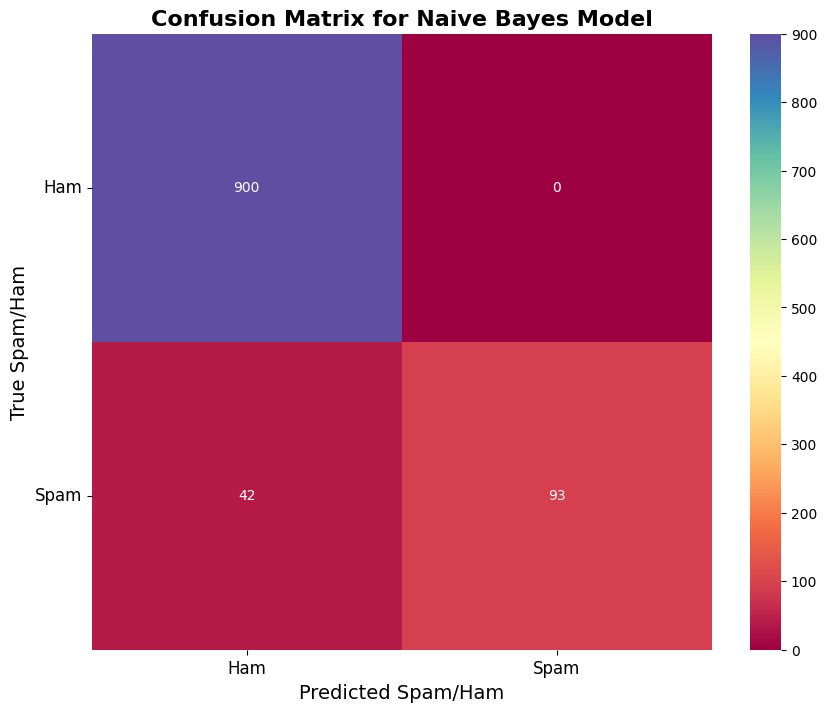

In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Spectral')
plt.xlabel('Predicted Spam/Ham', fontsize=14)
plt.ylabel('True Spam/Ham', fontsize=14)
plt.title('Confusion Matrix for Naive Bayes Model', fontsize=16, fontweight='bold')
plt.xticks([0.5, 1.5], ['Ham', 'Spam'], fontsize=12)
plt.yticks([0.5, 1.5], ['Ham', 'Spam'], fontsize=12, rotation=0)
plt.show()


In [ ]:
# New prediction
sample = "Congratulations! You've won a free ticket to Bahamas. Call now!"

In [ ]:
print("The result of sample message :  " ,model1.predict(vec.transform([sample])))

The result of sample message :   ['ham']
